In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'Desktop\customer_churn.csv')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sn

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
#Dropping empty cells
df = df[df['TotalCharges']!=' ']

In [46]:
df.drop(columns='customerID',inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [51]:
for i in df:
    
    print(df[i].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [52]:
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [56]:
#Label encoding
categorical_cols=[]
for i in df:
    if df[i].dtype==object:
        df[i].replace({'Yes':1,'No':0},inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [58]:
df['gender'].replace({'Male':1,'Female':0},inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [59]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


In [60]:
df1 = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])

In [63]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [66]:
tenure_no = df1[df1['Churn']==0].tenure
tenure_yes = df1[df1['Churn']==1].tenure

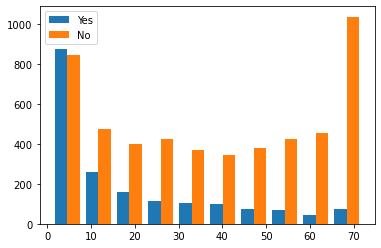

In [67]:
plt.hist([tenure_yes,tenure_no])
plt.legend(['Yes','No'])

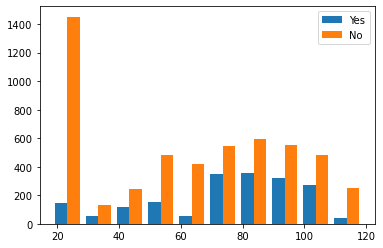

In [68]:
mc_no = df1[df1.Churn==0].MonthlyCharges      
mc_yes = df1[df1.Churn==1].MonthlyCharges     
plt.hist([mc_yes,mc_no])
plt.legend(['Yes','No'])

In [69]:
#Let's scale our data: Tenure, Monthly and total charges
from sklearn.preprocessing import MinMaxScaler
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()

df1[scale_cols] = scaler.fit_transform(df1[scale_cols])

In [71]:
X = df1.drop('Churn',axis='columns')
y= df1.Churn

In [115]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5,stratify=y)

In [116]:
x_train.shape

(4922, 26)

In [117]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(22,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
    
])
model.compile(optimizer = 'adam',
              loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
154/154 [==============================] - 1s 1ms/step - loss: 0.5635 - accuracy: 0.7123
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.7901
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4288 - accuracy: 0.7976
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4224 - accuracy: 0.8017
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8056
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8074
Epoch 7/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8090
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8104
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8123
Epoch 10/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4132 - accura

154/154 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8247
Epoch 82/100
154/154 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8259
Epoch 83/100
154/154 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.8247
Epoch 84/100
154/154 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8263
Epoch 85/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8247
Epoch 86/100
154/154 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8236
Epoch 87/100
154/154 [==============================] - 0s 1ms/step - loss: 0.3834 - accuracy: 0.8253
Epoch 88/100
154/154 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8259
Epoch 89/100
154/154 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8269
Epoch 90/100
154/154 [==============================] - 0s 1ms/step - loss: 0.3835 - accuracy: 

In [118]:
model.evaluate(x_test,y_test)

66/66 [==============================] - 0s 1ms/step - loss: 0.4315 - accuracy: 0.7905


[0.43151170015335083, 0.7905213236808777]

In [119]:
yp = model.predict(x_test)

In [120]:
y_pred = []
for i in yp:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [121]:
y_pred[:10]

[1, 1, 0, 0, 1, 1, 0, 0, 0, 1]

In [122]:
y_test[:10]

4785    1
4529    0
2548    0
3925    0
6033    1
1308    1
5033    0
5976    0
795     0
4641    0
Name: Churn, dtype: int64